In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Strategy for one stock portfolio

In [2]:
from TechnicalIndicators import *
from datetime import datetime as dt
import random 

random.seed(1)

In [3]:
import os
path = "tickers"  
files= os.listdir(path)  
s = []
for file in files: 
    #print(file)
    if '.csv' in file:
        stoc = pd.read_csv("tickers/" + file, sep = ",")
        print(file,  '  ',   stoc['date'][0], '  ', stoc['date'][len(stoc['date'])-1])
        s.append(file)

7012 JT.csv    2013-01-04    2021-03-19
9434 JT.csv    2020-10-02    2021-03-19
4902 JT.csv    2013-01-04    2021-03-19
5541 JT.csv    2013-01-04    2021-03-19
8604 JT.csv    2013-01-04    2021-03-19
9984 JT.csv    2013-01-04    2021-03-19
1332 JT.csv    2013-01-04    2021-03-19
8035 JT.csv    2013-01-04    2021-03-19
3086 JT.csv    2013-01-04    2021-03-19
3407 JT.csv    2013-01-04    2021-03-19
7004 JT.csv    2013-01-04    2021-03-19
8253 JT.csv    2013-01-04    2021-03-19
5706 JT.csv    2013-01-04    2021-03-19
2768 JT.csv    2013-01-04    2021-03-19
3865 JT.csv    2013-01-04    2017-09-29
9301 JT.csv    2013-01-04    2021-03-19
8002 JT.csv    2013-01-04    2021-03-19
5413 JT.csv    2013-01-04    2018-12-25
4004 JT.csv    2013-01-04    2021-03-19
6902 JT.csv    2013-01-04    2021-03-19
6954 JT.csv    2013-01-04    2021-03-19
7203 JT.csv    2013-01-04    2021-03-19
6767 JT.csv    2013-01-04    2017-01-23
1812 JT.csv    2013-01-04    2021-03-19
6366 JT.csv    2013-01-04    2019-07-31


In [4]:
len(s),s[:10]

(248,
 ['7012 JT.csv',
  '9434 JT.csv',
  '4902 JT.csv',
  '5541 JT.csv',
  '8604 JT.csv',
  '9984 JT.csv',
  '1332 JT.csv',
  '8035 JT.csv',
  '3086 JT.csv',
  '3407 JT.csv'])

### Time period

In [5]:
# backtesting parameters

days = 2000
end = dt(2020, 12, 1, 0, 0)
start = end - pd.Timedelta(days=days)
start

datetime.datetime(2015, 6, 11, 0, 0)

#### 10 assets in a portfolio

In [63]:
# portfolio of stocks -- randomly select

portfolio_stocks = []
asset_num = 10

indices = np.arange(len(s)) #0-247
np.random.shuffle(indices)

for i in indices[:asset_num]:
    portfolio_stocks.append(s[i])
    
print(portfolio_stocks)    #['2768 JT.csv', '6724 JT.csv', '1332 JT.csv', '5401 JT.csv', '9005 JT.csv', '9412 JT.csv', '9501 JT.csv', '4502 JT.csv', '7205 JT.csv', '3863 JT.csv']

['7270 JT.csv', '5333 JT.csv', '8002 JT.csv', '8252 JT.csv', '6472 JT.csv', '4041 JT.csv', '5803 JT.csv', '6367 JT.csv', '8604 JT.csv', '9062 JT.csv']


In [64]:
# defining a data frame to store portfolio returns
portfolio_strategy_returns = pd.DataFrame()
portfolio_daily_returns = pd.DataFrame()

# buy and hold returns for individual stocs
bnh_stock_returns = []
bnh_stock_sharpe = []

#### Strategy 1

In [65]:
def strategy1(data,ma1,ma2):  
    
    data["daily_returns"] = np.log(data["last"]/data["last"].shift())
    
    # calculating moving averages
    data['ma_short'] = data['last'].ewm(span=ma1).mean().shift()
    data['ma_long'] = data['last'].ewm(span=ma2).mean().shift()

    # creating positions
    data['position'] = np.where(data["ma_short"] > data["ma_long"], 1, 0)    
    data["strategy_returns"] = data["daily_returns"] * data["position"]
    
    return data["strategy_returns"]

#### Strategy 2

In [ ]:
def strategy2(data):
    
    data = bollinger_bands(data, moving_average, 20)  # 20 days
    data['daily_returns'] = np.log(data['last']/data['last'].shift(1))
    # BUY condition
    data['signal'] = np.where((data['last'] < data['lower_band']) &
                            (data['last'].shift(1) >= data['lower_band']),1,0)

    # SELL condition
    data['signal'] = np.where( (data['last'] > data['upper_band']) &
                              (data['last'].shift(1) <= data['upper_band']),-1,data['signal'])
    # creating long and short positions 
    data['position'] = data['signal'].replace(to_replace=0, method='ffill')

    # shifting by 1, to account of close price return calculations
    data['position'] = data['position'].shift(1)

    # calculating stretegy returns
    data['strategy_returns'] = data['daily_returns'] * (data['position'])
    
    return data["strategy_returns"]

## iterating over stocks in the portfolio

In [67]:
for stock in portfolio_stocks:
    data = pd.read_csv("tickers/" + stock, sep = ",")

    #portfolio_strategy_returns[stock] = strategy1 (data, ma1 = 3, ma2 = 8)   #strategy 1
    portfolio_strategy_returns[stock] = strategy2(data)   #strategy 2
    
    bnh_stock_returns.append(list(data["strategy_returns"].cumsum())[-1])
    bnh_stock_sharpe.append(252**(1/2) * (data["strategy_returns"].mean() / data["strategy_returns"].std()))

In [68]:
print("\nSTRATEGY RETURNS ON PORTFOLIO")
portfolio_strategy_returns["Portfolio_rets"] = portfolio_strategy_returns.mean(axis=1)
portfolio_strategy_returns.round(decimals = 4).head(10)


STRATEGY RETURNS ON PORTFOLIO


,7270 JT.csv,5333 JT.csv,8002 JT.csv,8252 JT.csv,6472 JT.csv,4041 JT.csv,5803 JT.csv,6367 JT.csv,8604 JT.csv,9062 JT.csv,Portfolio_rets
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
2,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
5,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
7,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
8,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
perf = pd.DataFrame(index=portfolio_stocks,columns=["Cumulative returns","Annualized Sharpe Ratio"])

for i,stock in enumerate(portfolio_stocks):
    cum_ret = bnh_stock_returns[i]
    anu_shp = bnh_stock_sharpe[i]
    perf.loc[stock] = [cum_ret,anu_shp]
    
perf

,Cumulative returns,Annualized Sharpe Ratio
7270 JT.csv,1.110793,0.414653
5333 JT.csv,-0.0784,-0.029876
8002 JT.csv,-0.710805,-0.317007
8252 JT.csv,0.994554,0.355984
6472 JT.csv,0.405316,0.122724
4041 JT.csv,0.696686,0.495597
5803 JT.csv,-0.813936,-0.265439
6367 JT.csv,-0.58608,-0.245506
8604 JT.csv,-1.683266,-0.643086
9062 JT.csv,1.083011,0.467163


In [70]:
perf.mean()

Cumulative returns         0.041787
Annualized Sharpe Ratio    0.035521
dtype: float64

In [71]:
print("Cumulative returns MA Stretegy                  :", list(portfolio_strategy_returns["Portfolio_rets"].cumsum())[-1])
print("Annualized sharpe ratio MA Strategy             :", 252**(1/2) * (portfolio_strategy_returns["Portfolio_rets"].mean() / portfolio_strategy_returns["Portfolio_rets"].std()))   
print("\n")

Cumulative returns MA Stretegy                  : 0.017203841691602745
Annualized sharpe ratio MA Strategy             : 0.010943138908133887




## Plotting

<Axes: title={'center': 'MOVING AVERAGES STRATEGY CUMULATIVE RETURNS'}>

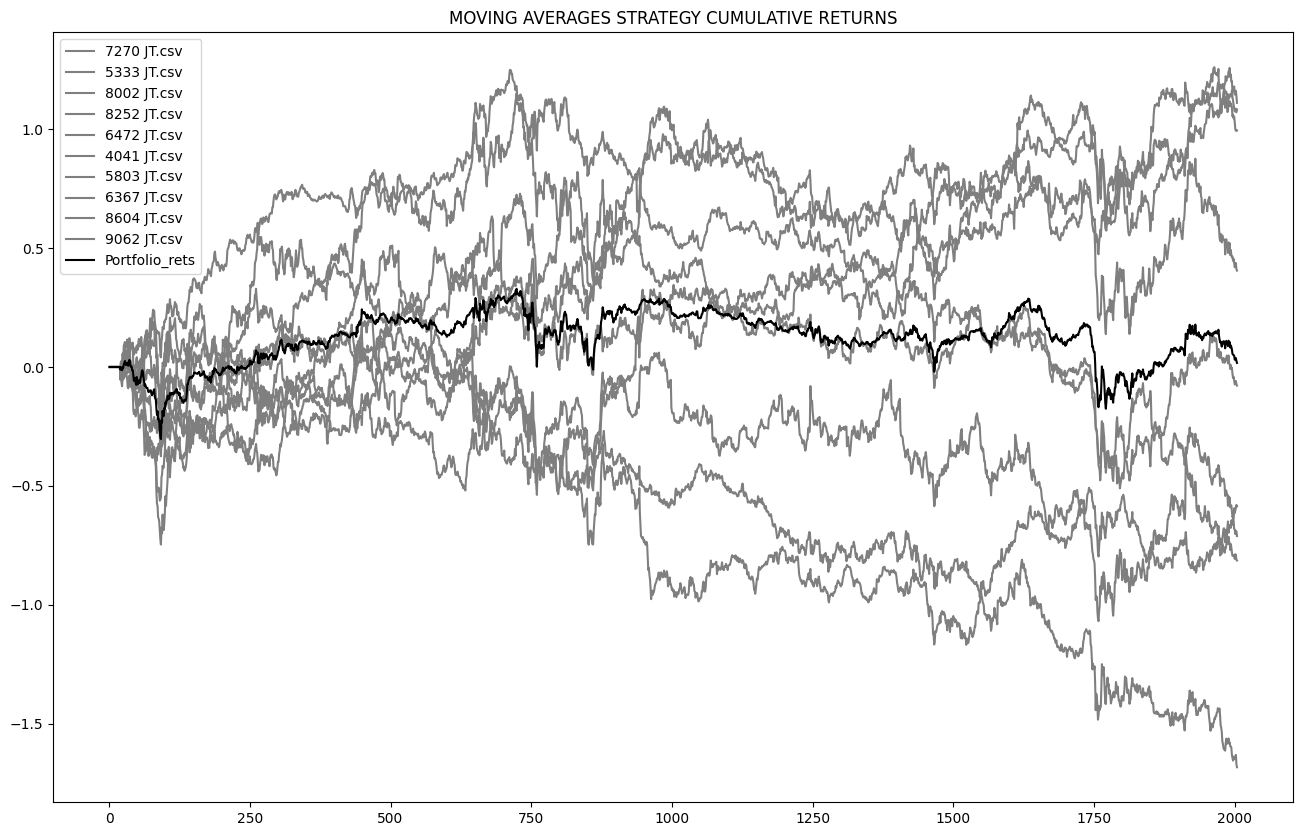

In [72]:
colors = ['tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray',"k"]
portfolio_strategy_returns.cumsum().plot(figsize=(16,10), title="MOVING AVERAGES STRATEGY CUMULATIVE RETURNS", color=colors)